In [13]:
import sys
sys.path.append("..")

from utils import *

# Correlatie en Regressie

In [15]:
def generate_latex_table(X, Y, labels):
    # Start building the LaTeX table
    xlabel, ylabel = labels.values()
    n = len(X)
    alignment_chars = "{c|" + "c" * n + "}"
    latex_code = f"""
        \\begin{{center}}
            \\begin{{tabular}}{alignment_chars}
                \\toprule
                    \\textbf{{{xlabel}}} {" ".join([f"& ${x}$" for x in X])} \\\\
                    \\textbf{{{ylabel}}} {" ".join([f"& ${y}$" for y in Y])} \\\\
                \\bottomrule
            \\end{{tabular}}
        \\end{{center}}
    """
    
    return latex_code

def generate_latex_table_regression(X, Y):
    X = np.array(X)
    Y = np.array(Y)
       
    # Start building the LaTeX table
    latex_code = """
        \\begin{center}
            \\begin{tabular}{ccccc}
                \\toprule
                    $x$ & $y$ & $xy$ & $x^2$ & $y^2$ \\\\
                \\midrule
    """
    
    # Populate table rows
    for x, y, xy, x2, y2 in zip(X, Y, X * Y, X ** 2, Y ** 2):
        x, y, xy, x2, y2 = map(lambda p: pretty_print(p), (x, y, xy, x2, y2))
        latex_code += f"\t\t${x}$ & ${y}$ & ${xy}$ & ${x2}$ & ${y2}$ \\\\\n"
    
    # Add final row with averages
    # Compute averages
    avg_X, avg_Y, avg_XY, avg_X2, avg_Y2 = map(lambda x: pretty_print(np.mean(x)), [X, Y, X * Y, X ** 2, Y ** 2])

    latex_code += f"""
                \\midrule
                    $\\overline{{x}} = {avg_X}$ & $\\overline{{y}} = {avg_Y}$ & $\\overline{{xy}} = {avg_XY}$ & $\\overline{{x^2}} = {avg_X2}$ & $\\overline{{y^2}} = {avg_Y2}$ \\\\
                \\bottomrule
            \\end{{tabular}}
        \\end{{center}}
    """    
    return latex_code

def regression_coefficients_latex(X, Y):  
    X = np.array(X)
    Y = np.array(Y)
    
    avg_X = np.mean(X)
    avg_Y = np.mean(Y)
    avg_XY = np.mean(X * Y)
    avg_X_squared = np.mean(X ** 2)
    
    # Beta_1 (slope)
    numerator = avg_XY - avg_X * avg_Y
    denominator = avg_X_squared - avg_X**2
    beta_1 = numerator / denominator
    
    # Beta_0 (intercept)
    beta_0 = avg_Y - beta_1 * avg_X
    
    # LaTeX output
    latex_code = f"""
        \\begin{{align*}}
            b &= \\frac{{\\overline{{xy}} - \\overline{{x}} \\cdot \\overline{{y}}}}{{\\overline{{x^2}} - (\\overline{{x}})^2}} \\\\
              &= \\frac{{{pretty_print(avg_XY)} - {pretty_print(avg_X)} \\cdot {pretty_print(avg_Y)}}}{{{pretty_print(avg_X_squared)} - ({pretty_print(avg_X)})^2}} \\\\
              &= \\frac{{{pretty_print(numerator)}}}{{{pretty_print(denominator)}}} \\approx {pretty_print(beta_1)} \\\\
            a &= \\overline{{y}} - b \\cdot \\overline{{x}} \\\\
              &= {pretty_print(avg_Y)} - {pretty_print(beta_1)} \\cdot {pretty_print(avg_X)} \\\\
              &\\approx {pretty_print(beta_0)}.
        \\end{{align*}}

        De formule van de regressielijn behorende bij deze steekproef is dus gelijk aan $Y = {pretty_print(beta_0)}{beta_1:+.4f}X$.
    """
    return latex_code, beta_0, beta_1


def pearson_correlation_latex(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    # Compute necessary statistical values
    avg_X, avg_Y, avg_XY, avg_X_squared, avg_Y_squared = np.mean(X), np.mean(Y), np.mean(X*Y), np.mean(X ** 2), np.mean(Y ** 2)

    
    # Compute Pearson correlation coefficient
    numerator = avg_XY - (avg_X * avg_Y)
    denominator = np.sqrt((avg_X**2 - avg_X_squared) * (avg_Y**2 - avg_Y_squared))
    r = numerator / denominator
    
    # Generate LaTeX output
    latex_code = f"""
        \\begin{{align*}}
            r(x,y)  &= \\frac{{ \\overline{{x \\cdot y}} - \\overline{{x}} \\cdot \\overline{{y}} }}{{ \\sqrt{{ (\\overline{{x}}^2 - \\overline{{x^2}}) \\cdot (\\overline{{y}}^2 - \\overline{{y^2}}) }} }}\\\\
                    &= \\frac{{ {pretty_print(avg_XY)} - {pretty_print(avg_X)} \\cdot {pretty_print(avg_Y)} }}{{ \\sqrt{{ ({pretty_print(avg_X)}^2 - {pretty_print(avg_X_squared)}) \\cdot ({pretty_print(avg_Y)}^{2} - {pretty_print(avg_Y_squared)}) }} }} \\\\
                    &= \\frac{{{pretty_print(numerator)}}}{{{pretty_print(denominator)}}} \\\\
                    &\\approx {pretty_print(r)}.
        \\end{{align*}}
    """
    return latex_code

def spearman_correlation_latex(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    if len(X) != len(Y):
        raise ValueError("Beide lijsten moeten dezelfde lengte hebben.")
    
    # Rangschik de gegevens
    ranks_X, ranks_Y = rankdata(X), rankdata(Y)
    print(ranks_X, ranks_Y)
    
    # Bereken de verschillen in rang
    d = ranks_X - ranks_Y
    d_squared = d ** 2
    sum_d_squared = sum(d_squared)
    n = len(X)
    alignment_chars = "c" + "c" * n
    
    # Spearman's rho
    numerator = 6 * np.sum(d_squared)
    denominator = n * (n**2 - 1)
    rho = 1 - (numerator / denominator)
    
    # Genereer LaTeX-uitvoer
    latex_code = f"""
        De eerste stap bij het berekenen van Spearman's correlatieco\\"effici\\"ent is het bepalen van de rankings van de uitkomsten voor $X$ en $Y$:
        \\begin{{center}}
            \\begin{{tabular}}{{{alignment_chars}}}
                \\toprule
                    {{\\bfseries Rangnummers $X$-waarden}} {" ".join([f"& ${i}$" for i in ranks_X])} \\\\
                    {{\\bfseries Rangnummers $Y$-waarden}} {" ".join([f"& ${i}$" for i in ranks_Y])} \\\\
                \\midrule
                    {{\\bfseries Verschillen $d_i$}} {" ".join([f"& ${diff}$" for diff in d])} \\\\
                    {{\\bfseries Kwadratische verschillen $d_i^2$}} {" ".join([f"& ${diff2}$" for diff2 in d_squared])} \\\\
                \\bottomrule
            \\end{{tabular}}
        \\end{{center}}

        De som van de kwadratische rangnummerverschillen is gelijk aan $\\sum_i d_i^2 = {sum_d_squared}$.
        Aangezien de steekproefgrootte gelijk is aan $n = {n}$, is de rangcorrelatieco\\"effici\\"ent van Spearman gelijk aan
        \\begin{{align*}}
            r_s &= 1 - \\frac{{ 6 \\cdot \\sum_i d_i^2 }}{{ n^3 - n }}  \\\\
                &= 1 - \\frac{{ 6 \\cdot {sum_d_squared} }}{{ {n}^3 - {n} }}  \\\\
                &\\approx {pretty_print(rho)}.
        \\end{{align*}}
    """
    
    return latex_code

## Betrouwbaarheidsinterval voor $E[Y]$ en voorspellingsinterval voor $Y$ gegeven $X = x$

In [17]:
def regression_confidence_interval(X, Y, beta_0, beta_1, x0, confidence=0.95):
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    mean_X2 = np.mean(X ** 2)
    mean_XY = np.mean(X * Y)
    mean_Y2 = np.mean(Y ** 2)
    confidence_percentage = int(100 * confidence)
    
    # 1. Compute the error terms and estimate the standard deviation of the error terms
    error_terms = Y - (beta_0 + beta_1 * X)
    sample_std_error = np.sqrt( np.sum( error_terms ** 2) / (n - 2) ) 

    # 2. Use the estimate to estimate the standard deviation of the mean Y given x
    sample_std_mean = sample_std_error * np.sqrt( 1 / n * (1 + ((x0 - mean_X) ** 2 / (mean_X2 - mean_X ** 2))) )

    y_pred = beta_0 + beta_1 * x0   
    t_crit = t.ppf((1 + confidence) / 2, df=n - 2)
    margin_error = t_crit * sample_std_mean

    # Generate LaTeX output
    latex_code = f"""
        De eerste stap is om de puntschatting voor $Y$ te bepalen aan de hand van de regressielijn $Y = {pretty_print(beta_0)}{beta_1:+.4f}X$ door $X = {x0}$ in te vullen.
        Dit geeft ons een puntschatting van $y_0 = {pretty_print(beta_0)} {beta_1:+.4f} \\cdot {x0} \\approx {pretty_print(y_pred)}$.
        Daarnaast kunnen we de standaardafwijking $\\sigma$ van de storingsterm $\\varepsilon$ schatten:
        \\begin{{align*}}
            s_{{\\varepsilon}} &= \\sqrt{{ \\frac{{n}}{{n-2}} \\cdot \\left( \\overline{{y^2}} - a \\cdot \\overline{{y}} - b \\cdot \\overline{{xy}} \\right) }} \\\\ 
                               &= \\sqrt{{ \\frac{{{n}}}{{{n-2}}} \\cdot \\left( {pretty_print(mean_Y2)} - {pretty_print(beta_0)} \\cdot {pretty_print(mean_Y)} - {pretty_print(beta_1)} \\cdot {pretty_print(mean_XY)} \\right) }} \\\\ 
                               &\\approx {pretty_print(sample_std_error)}.
        \\end{{align*}}

        Vervolgens kunnen we een puntschatting berekenen van de standaardafwijking van de verwachtingswaarde van $Y$ voor gegeven $X = x_0$:
        \\begin{{align*}}
        s_{{\\mu}}  &= s_{{\\varepsilon}} \\cdot \\sqrt{{ \\frac{{1}}{{n}} \\cdot \\left( 1 + \\frac{{(x_0 - \\overline{{x}})^2}}{{\\overline{{x^2}} - \\overline{{x}}^2}} \\right) }} \\\\
                    &= {sample_std_error} \\cdot \\sqrt{{ \\frac{{1}}{{{n}}} \\cdot \\left( 1 + \\frac{{({pretty_print(x0)} - {pretty_print(mean_X)})^2}}{{{pretty_print(mean_X2)} - {pretty_print(mean_X)}^2}} \\right) }} \\\\
                    &\\approx {pretty_print(sample_std_mean)}.   
        \\end{{align*}}

        Omdat we de standaardafwijkingen geschat hebben en de storingstermen normaal verdeeld zijn, moeten we werken met de $t$-verdeling met $df = n - 2 = {n-2}$ vrijheidsgraden.
        De $t$-waarde die hoort bij een betrouwbaarheidsniveau $\\alpha = {1-confidence}$ is gelijk aan
        \\[
            t = \\invt(\\text{{opp}} = 1 - \\alpha / 2; \\text{{df}} = n - 2) = \\invt(\\text{{opp}} = {1-alpha/2}; \\text{{df}} = {n-2}) \\approx {pretty_print(t_crit)}.
        \\]
        Het ${int(100 * confidence)}\\%$-betrouwbaarheidsinterval voor de gemiddelde $Y$ voor gegeven $X = x_0$ kan dus worden beschreven door
        \\begin{{align*}}
            &[y_0 - t \\cdot s_{{\\mu}}; y_0 - t \\cdot s_{{\\mu}}] \\\\
            &= [{pretty_print(y_pred)} - {pretty_print(t_crit)} \\cdot {pretty_print(sample_std_mean)}; {pretty_print(y_pred)} + {pretty_print(t_crit)} \\cdot {pretty_print(sample_std_mean)}] \\\\
            &\\approx [{pretty_print(y_pred - margin_error)}; {pretty_print(y_pred + margin_error)}].
        \\end{{align*}}
        
        Met \\SI{{{confidence_percentage}}}{{\\percent}} betrouwbaarheid ligt het gemiddelde van $Y$ voor gegeven $X = {x0}$ tussen ${pretty_print(y_pred - margin_error)}$ en ${pretty_print(y_pred + margin_error)}$.       
    """
    ci = (y_pred - margin_error, y_pred + margin_error)
    return latex_code, y_pred, ci

def regression_prediction_interval(X, Y, beta_0, beta_1, x0, confidence=0.95):
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    mean_X2 = np.mean(X ** 2)
    mean_XY = np.mean(X * Y)
    mean_Y2 = np.mean(Y ** 2)
    confidence_percentage = int(100 * confidence)

    error_terms = Y - (beta_0 + beta_1 * X)
    sample_std_error = np.sqrt( np.sum(error_terms ** 2) / (n - 2) )

    sample_std_pred = sample_std_error * np.sqrt( 1 + 1 / n * (1 + ((x0 - mean_X) ** 2 / (mean_X2 - mean_X ** 2))) )

    y_pred = beta_0 + beta_1 * x0
    t_crit = t.ppf((1 + confidence) / 2, df=n - 2)
    margin_error = t_crit * sample_std_pred
    pi_left, pi_right = (y_pred - margin_error, y_pred + margin_error)
    latex_code = f"""
        De eerste stap is om de puntschatting voor $Y$ te bepalen aan de hand van de regressielijn $Y = {pretty_print(beta_0)}{beta_1:+.4f} \\cdot X$ door $X = {x0}$ in te vullen.
        Dit geeft ons een puntschatting van $y_0 = {pretty_print(beta_0)} {beta_1:+.4f} \\cdot {x0} \\approx {pretty_print(y_pred)}$.
        Daarnaast kunnen we de standaardafwijking $\\sigma$ van de storingsterm $\\varepsilon$ schatten:
        \\begin{{align*}}
            s_{{\\varepsilon}} &= \\sqrt{{ \\frac{{n}}{{n-2}} \\cdot \\left( \\overline{{y^2}} - a \\cdot \\overline{{y}} - b \\cdot \\overline{{xy}} \\right) }} \\\\ 
                               &= \\sqrt{{ \\frac{{{n}}}{{{n-2}}} \\cdot \\left( {pretty_print(mean_Y2)} - {pretty_print(beta_0)} \\cdot {pretty_print(mean_Y)} - {pretty_print(beta_1)} \\cdot {pretty_print(mean_XY)} \\right) }} \\\\ 
                               &\\approx {pretty_print(sample_std_error)}. 
        \\end{{align*}}

        Vervolgens kunnen we een puntschatting berekenen van de standaardafwijking van $Y$ voor gegeven $X = x_0$:
        \\begin{{align*}}
            s_{{f}} &= s_{{\\varepsilon}} \\cdot \\sqrt{{ 1 + \\frac{{1}}{{n}} \\cdot \\left( 1 + \\frac{{(x_0 - \\overline{{x}})^2}}{{\\overline{{x^2}} - \\overline{{x}}^2}} \\right) }} \\\\
                    &= {pretty_print(sample_std_error)} \\cdot \\sqrt{{ 1 + \\frac{{1}}{{{n}}} \\cdot \\left( 1 + \\frac{{({x0} - {pretty_print(mean_X)})^2}}{{{pretty_print(mean_X2)} - {pretty_print(mean_X)}^2}} \\right) }} \\\\
                    &\\approx {pretty_print(sample_std_pred)}.         
        \\end{{align*}}

        Omdat we de standaardafwijkingen geschat hebben en de storingstermen normaal verdeeld zijn, moeten we werken met de $t$-verdeling met $df = n - 2 = {n-2}$ vrijheidsgraden.
        De $t$-waarde die hoort bij een betrouwbaarheidsniveau $\\alpha = {1-confidence}$ is gelijk aan
        \\[
            t = \\invt(\\text{{opp}} = 1 - \\alpha / 2; \\text{{df}} = n - 2) = \\invt(\\text{{opp}} = {1-alpha/2}; \\text{{df}} = {n-2}) \\approx {pretty_print(t_crit)}.
        \\]
        Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval voor de gemiddelde $Y$ voor gegeven $X = x_0$ kan dus worden beschreven door
        \\begin{{align*}}
            &[y_0 - t \\cdot s_{{f}}; y_0 - t \\cdot s_{{f}}] \\\\ 
            &= [{pretty_print(y_pred)} - {pretty_print(t_crit)} \\cdot {pretty_print(sample_std_pred)}; {pretty_print(y_pred)} + {pretty_print(t_crit)} \\cdot {pretty_print(sample_std_pred)}] \\\\ 
            &\\approx [{pretty_print(y_pred - margin_error)}; {pretty_print(y_pred + margin_error)}]. 
        \\end{{align*}}
        
        Met \\SI{{{confidence_percentage}}}{{\\percent}} betrouwbaarheid ligt een toekomstige uitkomst van $Y$ voor gegeven $X = {x0}$ tussen ${pretty_print(pi_left)}$ en ${pretty_print(pi_right)}$.
    """

    return latex_code, y_pred, (pi_left, pi_right)


In [18]:
def add_midpoint_lines_and_quadrants(mean_X, mean_Y):
    left, right = plt.xlim()
    bottom, top = plt.ylim()

    plt.axvline(mean_X, linestyle="--", color=secondary_plot_color)
    plt.axhline(mean_Y, linestyle="--", color=secondary_plot_color)

    p, q = 0.2, 0.8
    quadrant_labels = [
        (p * mean_X + (1 - p) * right, q * mean_Y + (1 - q) * top, "> 0", "> 0"),
        (p * mean_X + (1 - p) * left, q * mean_Y + (1 - q) * top, "< 0", "> 0"),
        (p * mean_X + (1 - p) * left, q * mean_Y + (1 - q) * bottom, "< 0", "< 0"),
        (p * mean_X + (1 - p) * right, q * mean_Y + (1 - q) * bottom, "> 0", "< 0"),
    ]
    for x, y, dx, dy in quadrant_labels:
        plt.text(x, y, f"$x_i - \\overline{{x}} {dx}$\n$y_i - \\overline{{y}} {dy}$", ha="center", va="center")

def fit_regression_and_plot_line(X, Y):
    model = LinearRegression()
    model.fit(X, Y)
    x_vals = np.linspace(np.min(X), np.max(X), 200).reshape(-1, 1)
    y_hat = model.predict(x_vals)

    m, b = model.coef_[0], model.intercept_
    label = f"Regressielijn: $Y = {pretty_print(b)}{m:+.4f}X$"
    plt.plot(x_vals, y_hat, color=critical_color, label=label)

    return model, x_vals.ravel(), y_hat

def plot_residuals(X, Y, model):
    for i, (xi, yi) in enumerate(zip(X[:, 0], Y)):
        y_pred = model.predict([[xi]])[0]
        label = "Afstanden: $e_i = y_i - (a + b \\cdot x_i)$" if i == 0 else None
        plt.plot([xi, xi], [yi, y_pred], linestyle="--", color=primary_plot_color, alpha=0.6, label=label)
    
def plot_y0(x_0, model):
    left, right = plt.xlim()
    bottom, top = plt.ylim()
    y_0 = model.predict([[x_0]])[0]

    plt.plot([x_0, x_0], [bottom, y_0], linestyle="--", color=primary_plot_color)
    plt.plot([left, x_0], [y_0, y_0], linestyle="--", color=primary_plot_color,
             label=f"Puntschatting voor $Y \\mid X = {x_0}$: ${pretty_print(y_0)}$")

def plot_intervals(X, Y, x_vals, y_hat, model, x_0, plot_prediction_interval, plot_confidence_interval):
    n = len(X)
    x_mean = np.mean(X)
    Sxx = np.sum((X - x_mean) ** 2)
    residuals = Y - model.predict(X)
    s_squared = np.sum(residuals ** 2) / (n - 2)
    s = np.sqrt(s_squared)
    t_val = t.ppf(0.975, df=n - 2)

    se_mean = s * np.sqrt(1/n + (x_vals - x_mean)**2 / Sxx)
    se_pred = s * np.sqrt(1 + 1/n + (x_vals - x_mean)**2 / Sxx)

    ci_upper, ci_lower = y_hat + t_val * se_mean, y_hat - t_val * se_mean
    pi_upper, pi_lower = y_hat + t_val * se_pred, y_hat - t_val * se_pred

    if plot_prediction_interval:
        plt.fill_between(x_vals, pi_lower, pi_upper, color=critical_color, alpha=0.2,
                         label='Voorspellingsinterval (voor $Y \\mid X$)')
        if x_0:
            y_0 = model.predict([[x_0]])[0]
            se_pred_0 = s * np.sqrt(1 + 1/n + (x_0 - x_mean)**2 / Sxx)
            lower, upper = y_0 - t_val * se_pred_0, y_0 + t_val * se_pred_0
            plt.plot([x_0, x_0], [lower, upper], color=critical_color, linestyle="--", alpha=0.3,
                     label=f'Voorspellingsinterval (voor $Y \\mid X={x_0}$): [{pretty_print(lower)}; {pretty_print(upper)}]')

    if plot_confidence_interval:
        plt.fill_between(x_vals, ci_lower, ci_upper, color=acceptable_color, alpha=0.3,
                         label='Betrouwbaarheidsinterval (voor $E[Y \\mid X]$)')
        if x_0:
            y_0 = model.predict([[x_0]])[0]
            se_mean_0 = s * np.sqrt(1/n + (x_0 - x_mean)**2 / Sxx)
            lower, upper = y_0 - t_val * se_mean_0, y_0 + t_val * se_mean_0
            plt.plot([x_0, x_0], [lower, upper], color=acceptable_color, linestyle="--", alpha=0.3,
                     label=f'Betrouwbaarheidsinterval (voor $E[Y \\mid X={x_0}$): [{pretty_print(lower)}; {pretty_print(upper)}]')
            

def plot_linear_regression(
        X, Y, labels, filename, x_0=None,
        plot_midpoint_lines=False, plot_least_squares=False, plot_regression_line=False, 
        plot_point_estimate=False,
        plot_prediction_interval=False, plot_confidence_interval=False
):
    # Convert lists to numpy arrays
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)

    mean_X, mean_Y = np.mean(X), np.mean(Y)

    # Create scatter plot
    plt.scatter(X, Y, color=primary_plot_color)
    plt.title(f'Spreidingsdiagram: {labels["X"]} vs. {labels["Y"]}')
    
    # Label axes and add title
    plt.xlabel(labels["X"])
    plt.ylabel(labels["Y"])

    if plot_midpoint_lines:
        add_midpoint_lines_and_quadrants(mean_X, mean_Y)
              
    if plot_regression_line:
        model, x_vals, y_hat = fit_regression_and_plot_line(X, Y)
    
        if plot_least_squares:
            plot_residuals(X, Y, model)

        if x_0 and plot_point_estimate:
            plot_y0(x_0, model)
    
        if plot_prediction_interval or plot_confidence_interval:
            plot_intervals(X, Y, x_vals, y_hat, model, x_0, plot_prediction_interval, plot_confidence_interval)

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

    
    # Save plot
    plt.savefig(filename, bbox_inches='tight')

### Voorbeeld gebruik


        \begin{center}
            \begin{tabular}{c|cccccccccc}
                \toprule
                    \textbf{Slaaptijd (in uren)} & $7.4$ & $8.1$ & $8.3$ & $7.8$ & $7.9$ & $8.0$ & $7.7$ & $8.2$ & $7.6$ & $8.0$ \\
                    \textbf{Hersteltijd na zware inspanning (in uren)} & $8.3$ & $8.7$ & $8.9$ & $8.2$ & $8.5$ & $8.4$ & $8.8$ & $8.6$ & $8.3$ & $8.5$ \\
                \bottomrule
            \end{tabular}
        \end{center}
    

        \begin{center}
            \begin{tabular}{ccccc}
                \toprule
                    $x$ & $y$ & $xy$ & $x^2$ & $y^2$ \\
                \midrule
    		$7.4$ & $8.3$ & $61.42$ & $54.76$ & $68.89$ \\
		$8.1$ & $8.7$ & $70.47$ & $65.61$ & $75.69$ \\
		$8.3$ & $8.9$ & $73.87$ & $68.89$ & $79.21$ \\
		$7.8$ & $8.2$ & $63.96$ & $60.84$ & $67.24$ \\
		$7.9$ & $8.5$ & $67.15$ & $62.41$ & $72.25$ \\
		$8$ & $8.4$ & $67.2$ & $64$ & $70.56$ \\
		$7.7$ & $8.8$ & $67.76$ & $59.29$ & $77.44$ \\
		$8.2$ & $8.6$ & $70.52$ & $67.24$ &

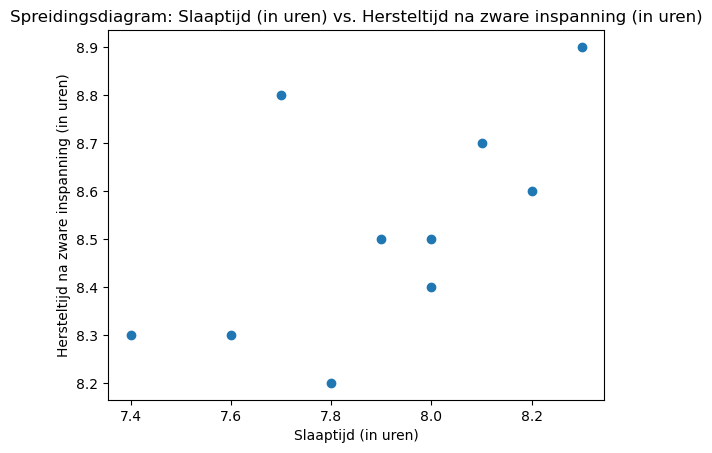

In [38]:
np.random.seed(42)  # Zet de seed
X = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
            # + np.random.normal(loc=0, scale=40, size=len(Y))# oefeningstijd (min)
Y = [66, 61, 63, 62, 65, 64, 57, 59, 60]

X = [7.4, 8.1, 8.3, 7.8, 7.9, 8.0, 7.7, 8.2, 7.6, 8.0]  # F-16
Y = [8.3, 8.7, 8.9, 8.2, 8.5, 8.4, 8.8, 8.6, 8.3, 8.5]  # F-35

X_pred = 6.75
labels = {
    "X": "Slaaptijd (in uren)",
    "Y": "Hersteltijd na zware inspanning (in uren)"
}

# Generate LaTeX table for the question itself (horizontal)
latex_table = generate_latex_table(X, Y, labels)
print(latex_table)

# Plot X and Y in a scatter plot
plot_linear_regression(X, Y, labels, x_0 = X_pred, \
                           plot_least_squares=False, plot_regression_line=False, \
                           plot_point_estimate=False, plot_prediction_interval=False,\
                           filename=FIGURE_PATH + "20250725_q4_scatterplot.png")

# Generate LaTeX table for computing the regression line and the correlation coefficient
regression_table = generate_latex_table_regression(X, Y)
print(regression_table)

regression_coefficients, a, b = regression_coefficients_latex(X, Y)
print(regression_coefficients)

Y_pred = a + b * X_pred
print(f"Voorspelde waarde voor $Y$ bij $X = {X_pred}$ is gelijk aan {Y_pred}")

pearson = pearson_correlation_latex(X, Y)
print(pearson)

spearman = spearman_correlation_latex(X, Y)
print(spearman)

# Confidence interval for the mean given x0
x0 = 6.75
alpha = 0.1

confidence_interval, y_pred, ci = regression_confidence_interval(X, Y, a, b, x0, confidence=1-alpha)
print(confidence_interval)

prediction_interval, y_pred, pi = regression_prediction_interval(X, Y, a, b, x0, confidence=1-alpha)
print(prediction_interval)